In [0]:
import tropycal.tracks as tracks
import datetime as dt
import pandas as pd
import numpy as np
import os
import datetime as dt
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()
import plotly
plotly.__version__
import plotly.io as pio
pio.templates.default = "plotly_dark"


In [0]:
hurdat_atl = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.62 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (8.65 seconds)

In [0]:
hurdat_atl

Out[3]: <tropycal.tracks.Dataset>
Dataset Summary:
 Basin: north_atlantic
 Source: hurdat
 Number of storms: 1925
 Maximum wind: 165 knots (Allen 1980)
 Minimum pressure: 882 hPa (Wilma 2005)
 Year range: 1851 — 2021

In [0]:
season = hurdat_atl.get_season(2017)
print(season)

<tropycal.tracks.Season>
Season Summary:
 Total Storms: 18
 Named Storms: 17
 Hurricanes: 10
 Major Hurricanes: 6
 Season ACE: 224.8

More Information:
 year: 2017
 basin: north_atlantic
 source_basin: north_atlantic
 source: hurdat
 source_info: NHC Hurricane Database

In [0]:
sn=season.to_dataframe()

In [0]:
sn

Out[37]:

,id,name,vmax,mslp,category,ace,start_time,end_time,start_lat,start_lon
0,AL012017,ARLENE,45,990,0,0.8,2017-04-19 00:00:00,2017-04-21 06:00:00,31.1,-42.6
1,AL022017,BRET,45,1007,0,0.5,2017-06-19 18:00:00,2017-06-20 09:00:00,9.2,-58.9
2,AL032017,CINDY,50,991,0,1.8,2017-06-20 18:00:00,2017-06-23 12:00:00,25.6,-90.6
3,AL042017,FOUR,25,1009,-1,0.0,2017-07-05 18:00:00,2017-07-07 12:00:00,12.0,-37.1
4,AL052017,DON,45,1005,0,0.8,2017-07-17 06:00:00,2017-07-18 12:00:00,10.4,-49.1
5,AL062017,EMILY,50,1001,0,0.6,2017-07-30 18:00:00,2017-08-01 18:00:00,28.4,-85.4
6,AL072017,FRANKLIN,75,981,1,3.7,2017-08-07 00:00:00,2017-08-10 12:00:00,16.1,-82.7
7,AL082017,GERT,95,962,2,7.8,2017-08-12 18:00:00,2017-08-17 12:00:00,24.0,-69.4
8,AL092017,HARVEY,115,937,4,11.4,2017-08-17 06:00:00,2017-09-01 00:00:00,13.4,-52.0
9,AL112017,IRMA,155,914,5,64.9,2017-08-30 00:00:00,2017-09-12 00:00:00,16.1,-26.9


In [0]:
storm = hurdat_atl.get_storm(('DELTA',2020))

In [0]:
st=storm.to_dataframe()

In [0]:
st

Out[9]:

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,2020-10-04 18:00:00,0,,TD,16.4,-76.2,30,1006,north_atlantic
1,2020-10-05 00:00:00,0,,TD,16.4,-77.0,30,1006,north_atlantic
2,2020-10-05 06:00:00,0,,TD,16.4,-77.7,30,1006,north_atlantic
3,2020-10-05 12:00:00,0,,TS,16.4,-78.4,40,1004,north_atlantic
4,2020-10-05 18:00:00,0,,TS,16.4,-79.1,55,985,north_atlantic
5,2020-10-06 00:00:00,0,,HU,16.6,-79.8,65,980,north_atlantic
6,2020-10-06 06:00:00,0,,HU,17.1,-80.7,75,973,north_atlantic
7,2020-10-06 12:00:00,0,,HU,17.8,-82.0,100,959,north_atlantic
8,2020-10-06 18:00:00,0,,HU,18.5,-83.3,120,953,north_atlantic
9,2020-10-07 00:00:00,0,,HU,19.3,-84.6,100,962,north_atlantic


In [0]:
# ibtracs = tracks.TrackDataset(basin='north_atlantic',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

In [0]:
# ssn= ibtracs.get_season((2020))

In [0]:
# ssn=ssn.to_dataframe()


In [0]:
# ssn

In [0]:
# storm = ibtracs.get_storm(('AMANDA:CRISTOBAL',2020))


In [0]:
# st=storm.to_dataframe()

In [0]:
# print(hurdat_atl.search_name('Michael'))

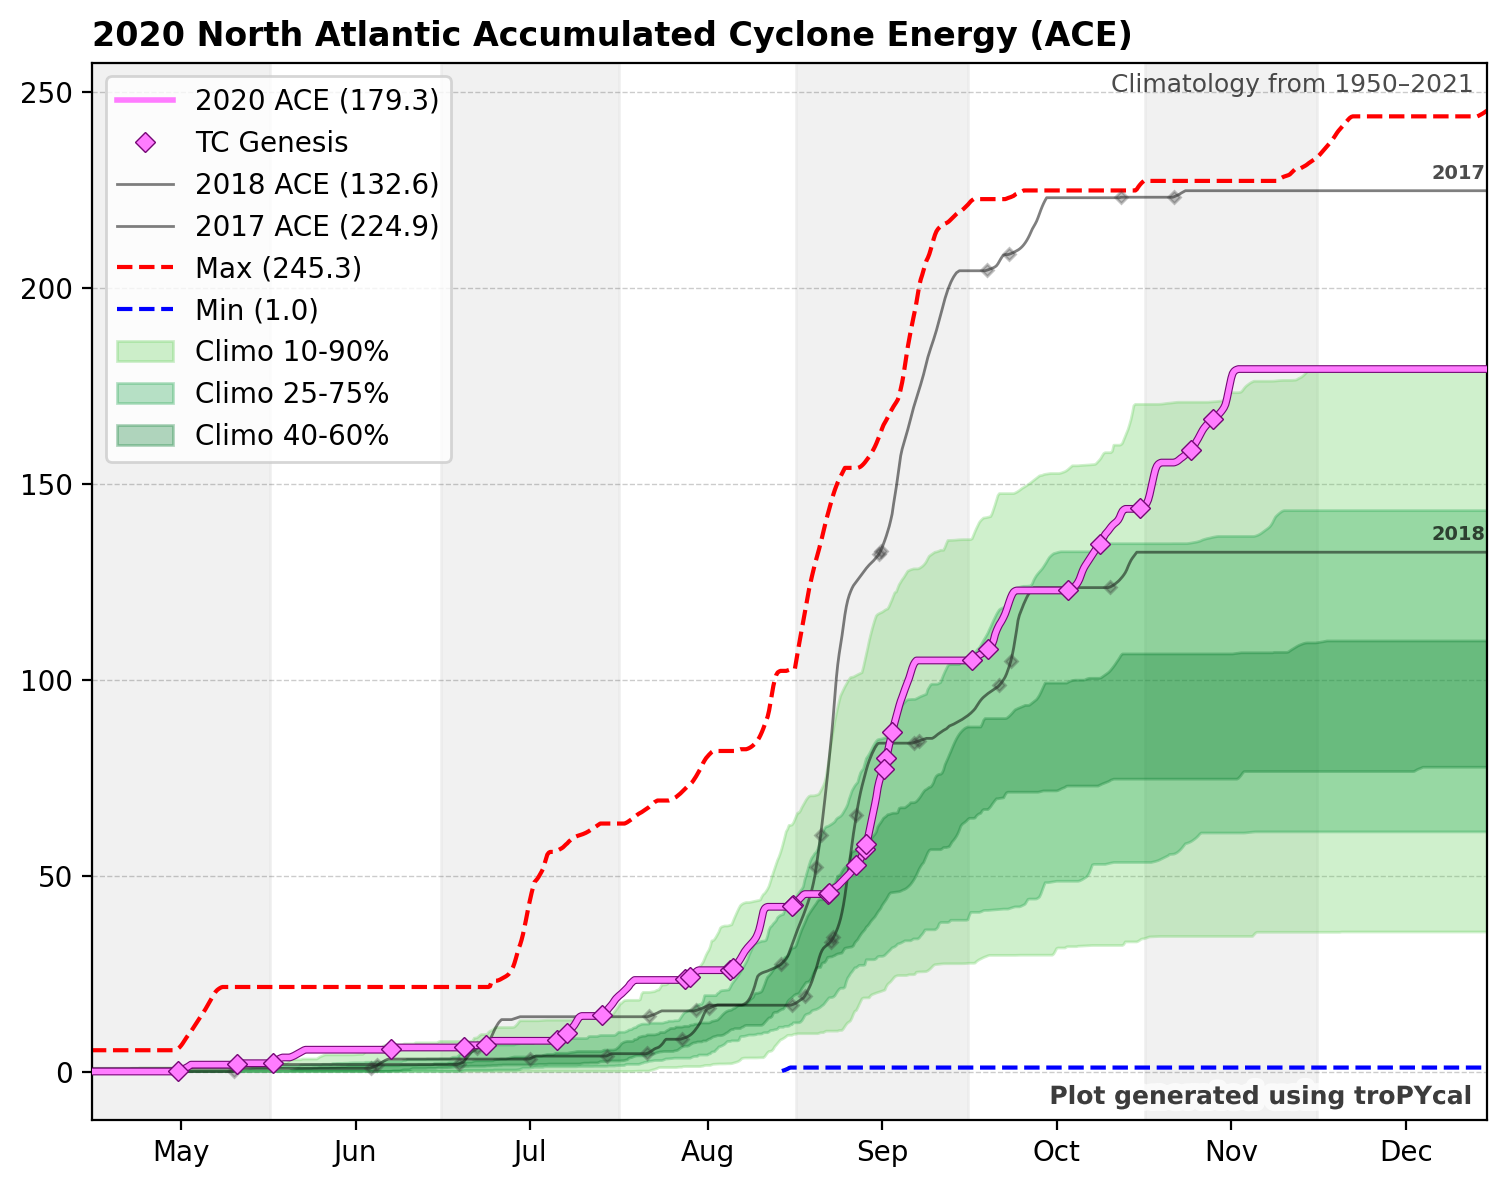

In [0]:
hurdat_atl.ace_climo(plot_year=2020,compare_years=[2018,2017])

We can use the same function to perform a rolling sum, rather than a year-to-date sum. This highlights particularly active periods of tropical cyclone activity. We'll use the same function as before, but with a ``rolling_sum=30`` argument provided:

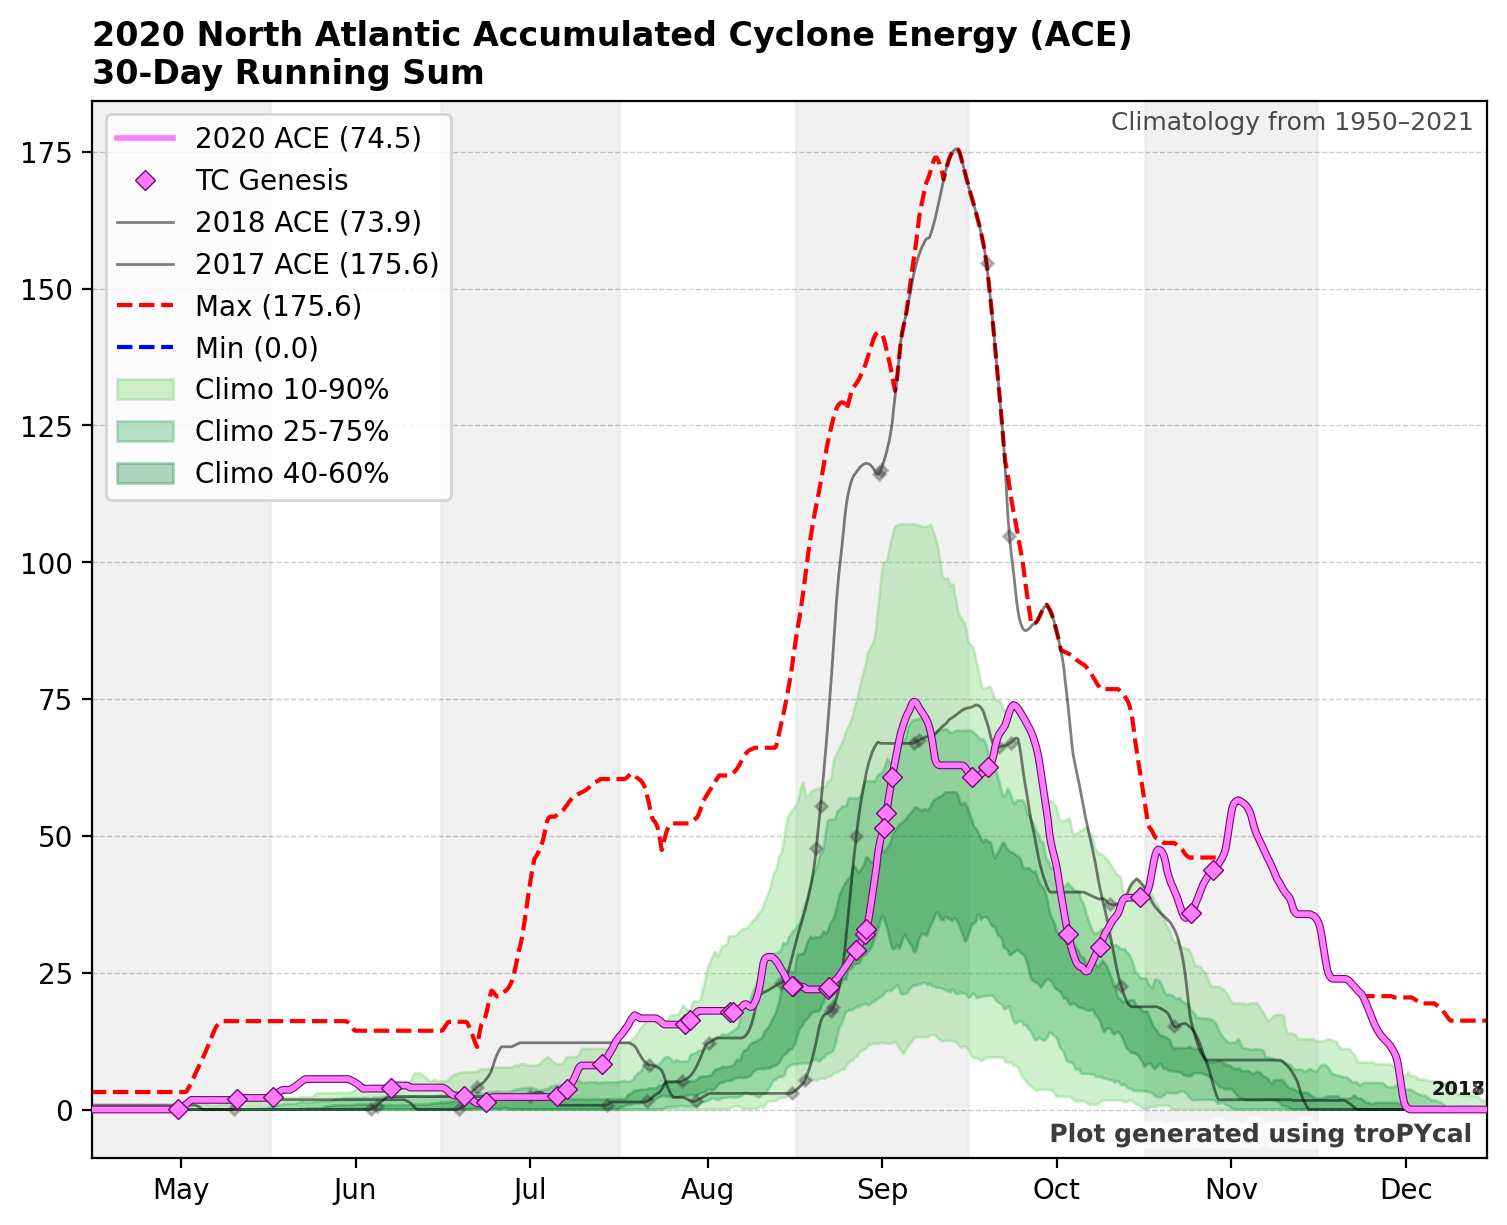

In [0]:
hurdat_atl.ace_climo(rolling_sum=30,plot_year=2020,compare_years=[2018,2017])

Plot cumulative hurricane days for all categories, with 2018 highlighted:

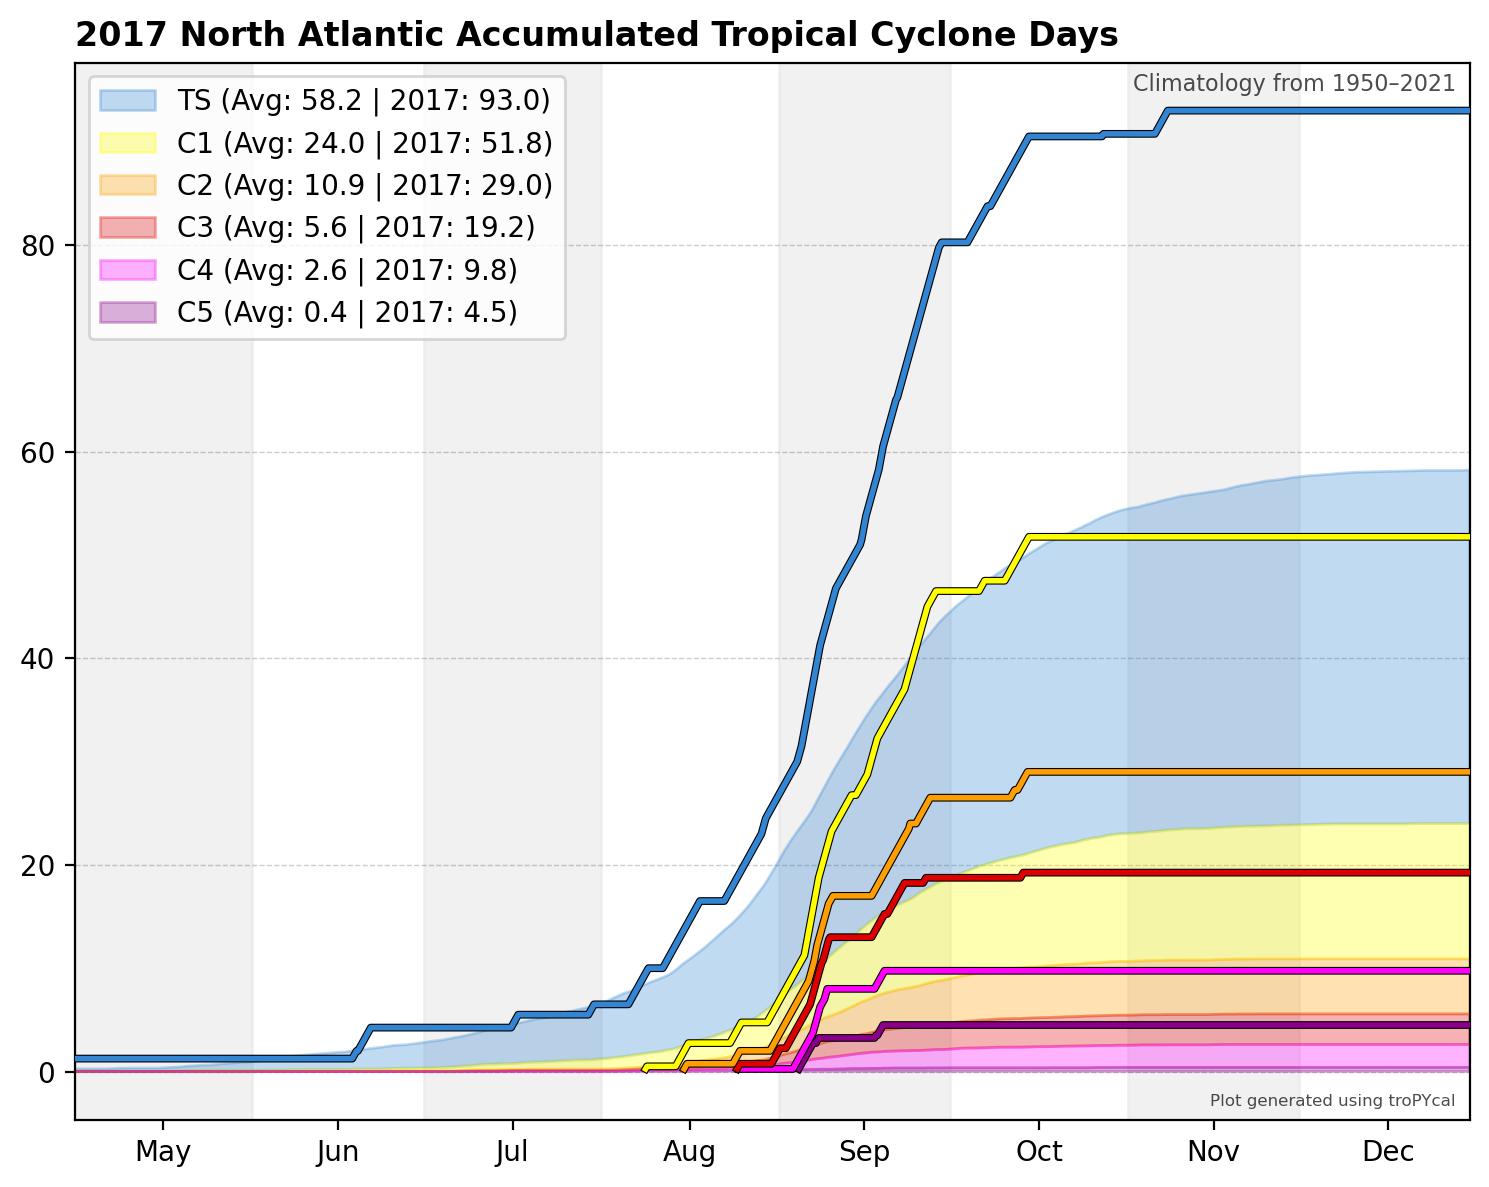

In [0]:
hurdat_atl.hurricane_days_climo(plot_year=2017)

Another climatological analysis available is a climatological correlation between maximum sustained wind and minimum mean sea level pressure (MSLP). While both variables are generally well correlated, factors such as background MSLP and MSLP gradient can affect this relationship.

This function plots the climatological correlation and distribution of wind-MSLP relationship, and can also plot individual storms for comparison against the climatology. We'll look at Hurricane Sandy (2012), which started out with a fairly typical wind-MSLP relationship, but towards the end of its life cycle ended up with an anomalously low MSLP given its sustained wind speed as it substantially grew in size.

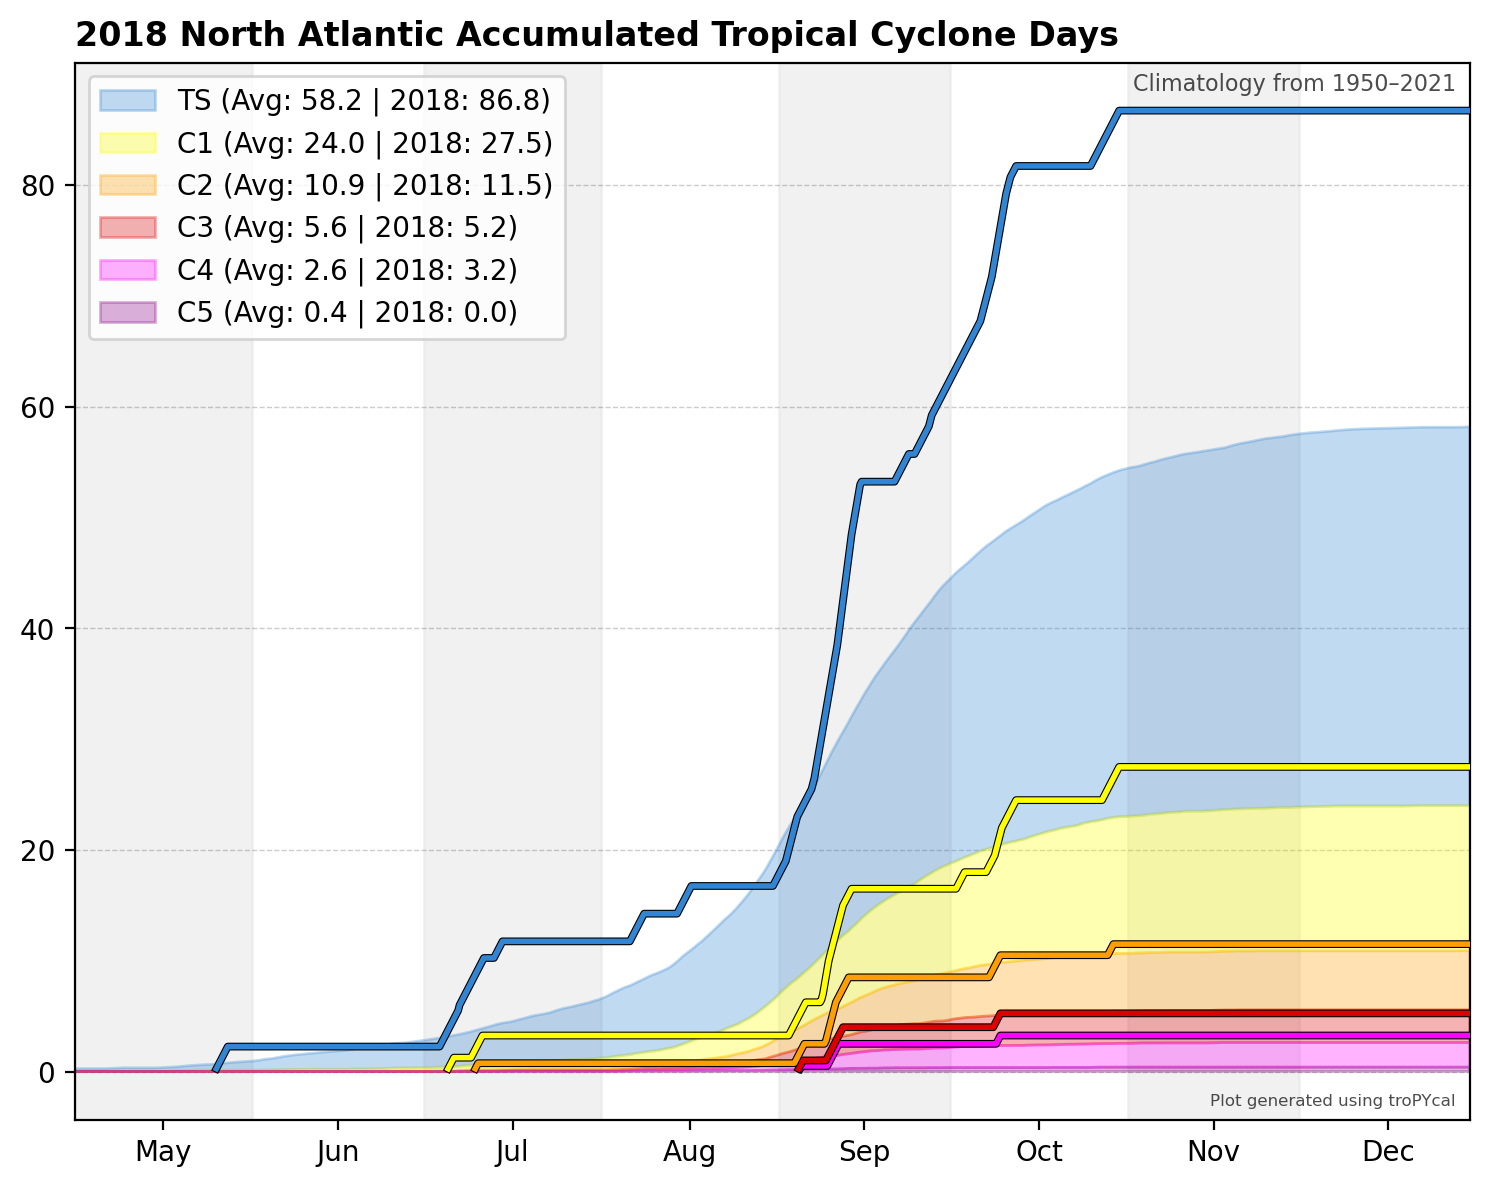

In [0]:
hurdat_atl.hurricane_days_climo(plot_year=2018)

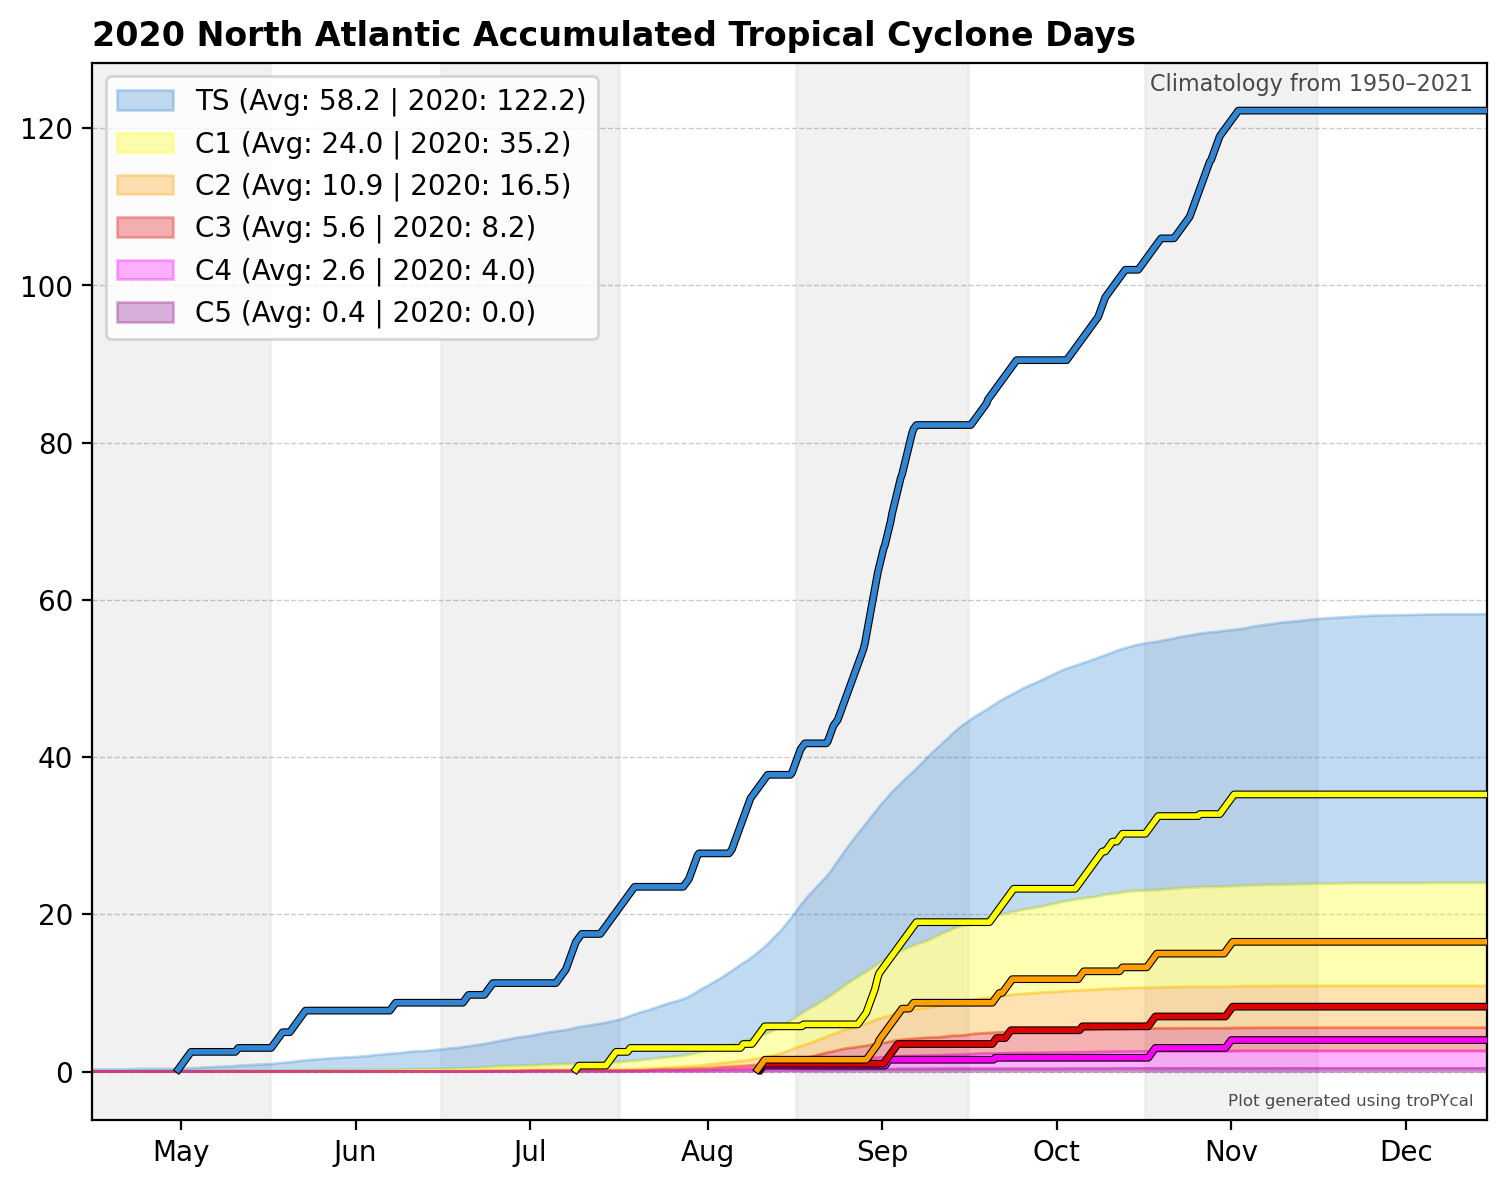

In [0]:
hurdat_atl.hurricane_days_climo(plot_year=2020)

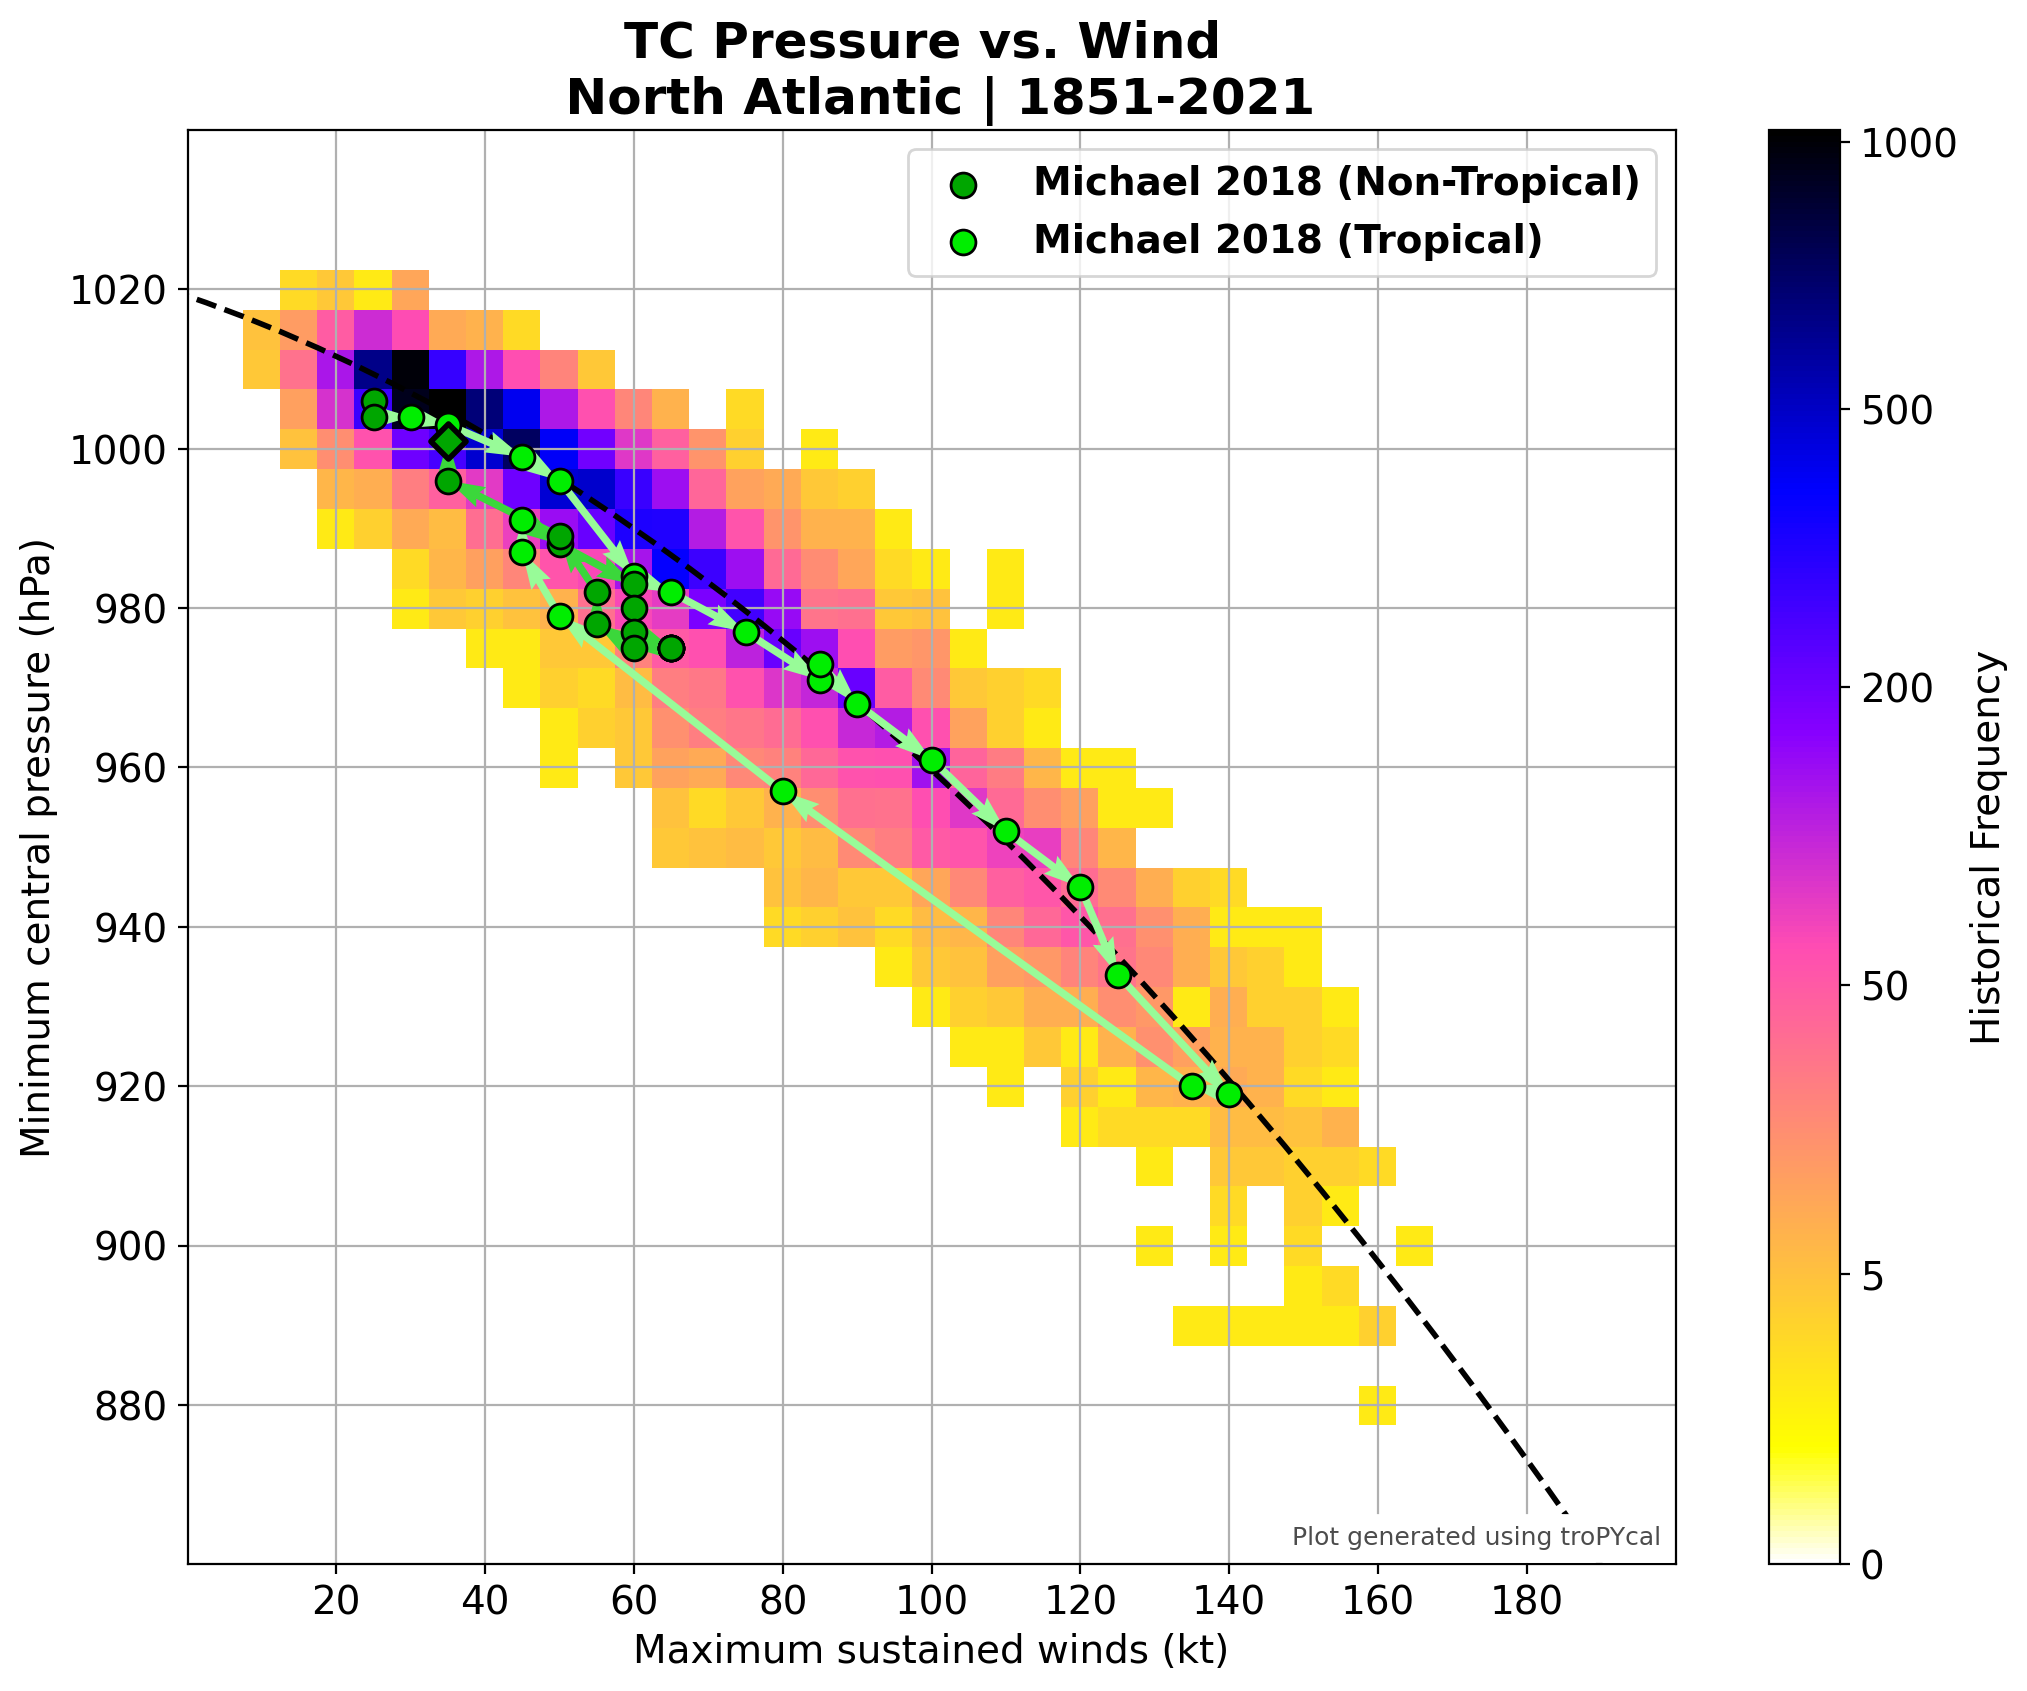

In [0]:
hurdat_atl.wind_pres_relationship(storm=('michael',2018))

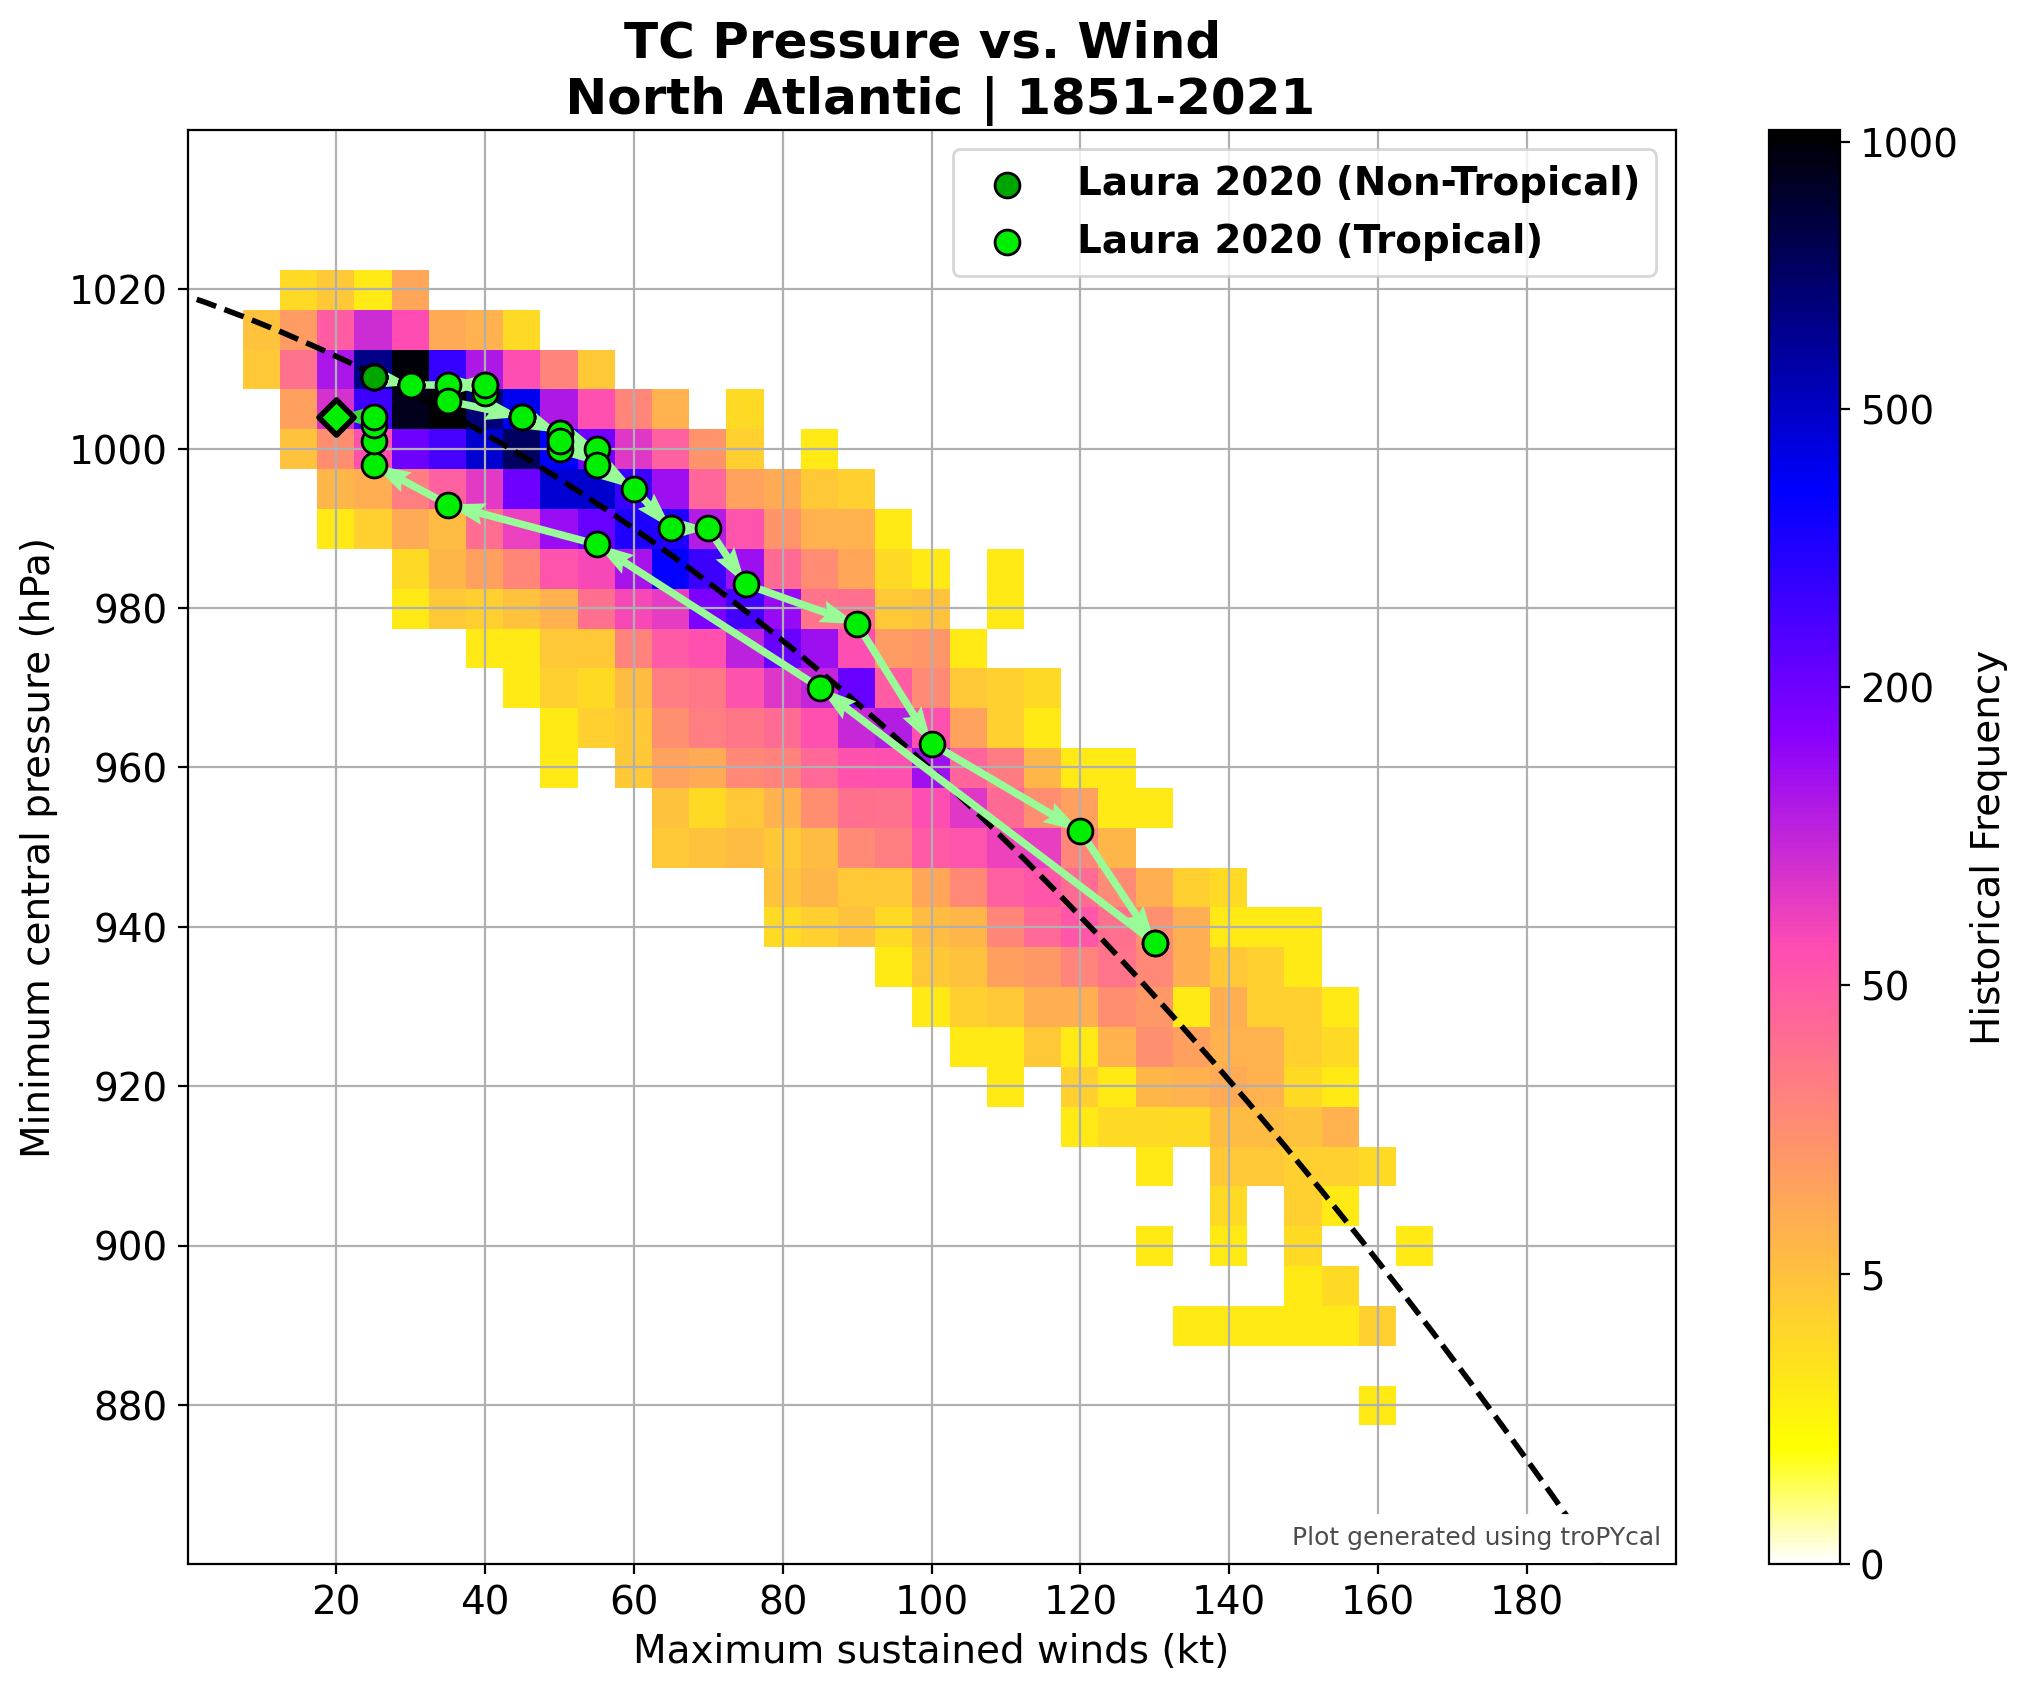

In [0]:
hurdat_atl.wind_pres_relationship(storm=('laura',2020))

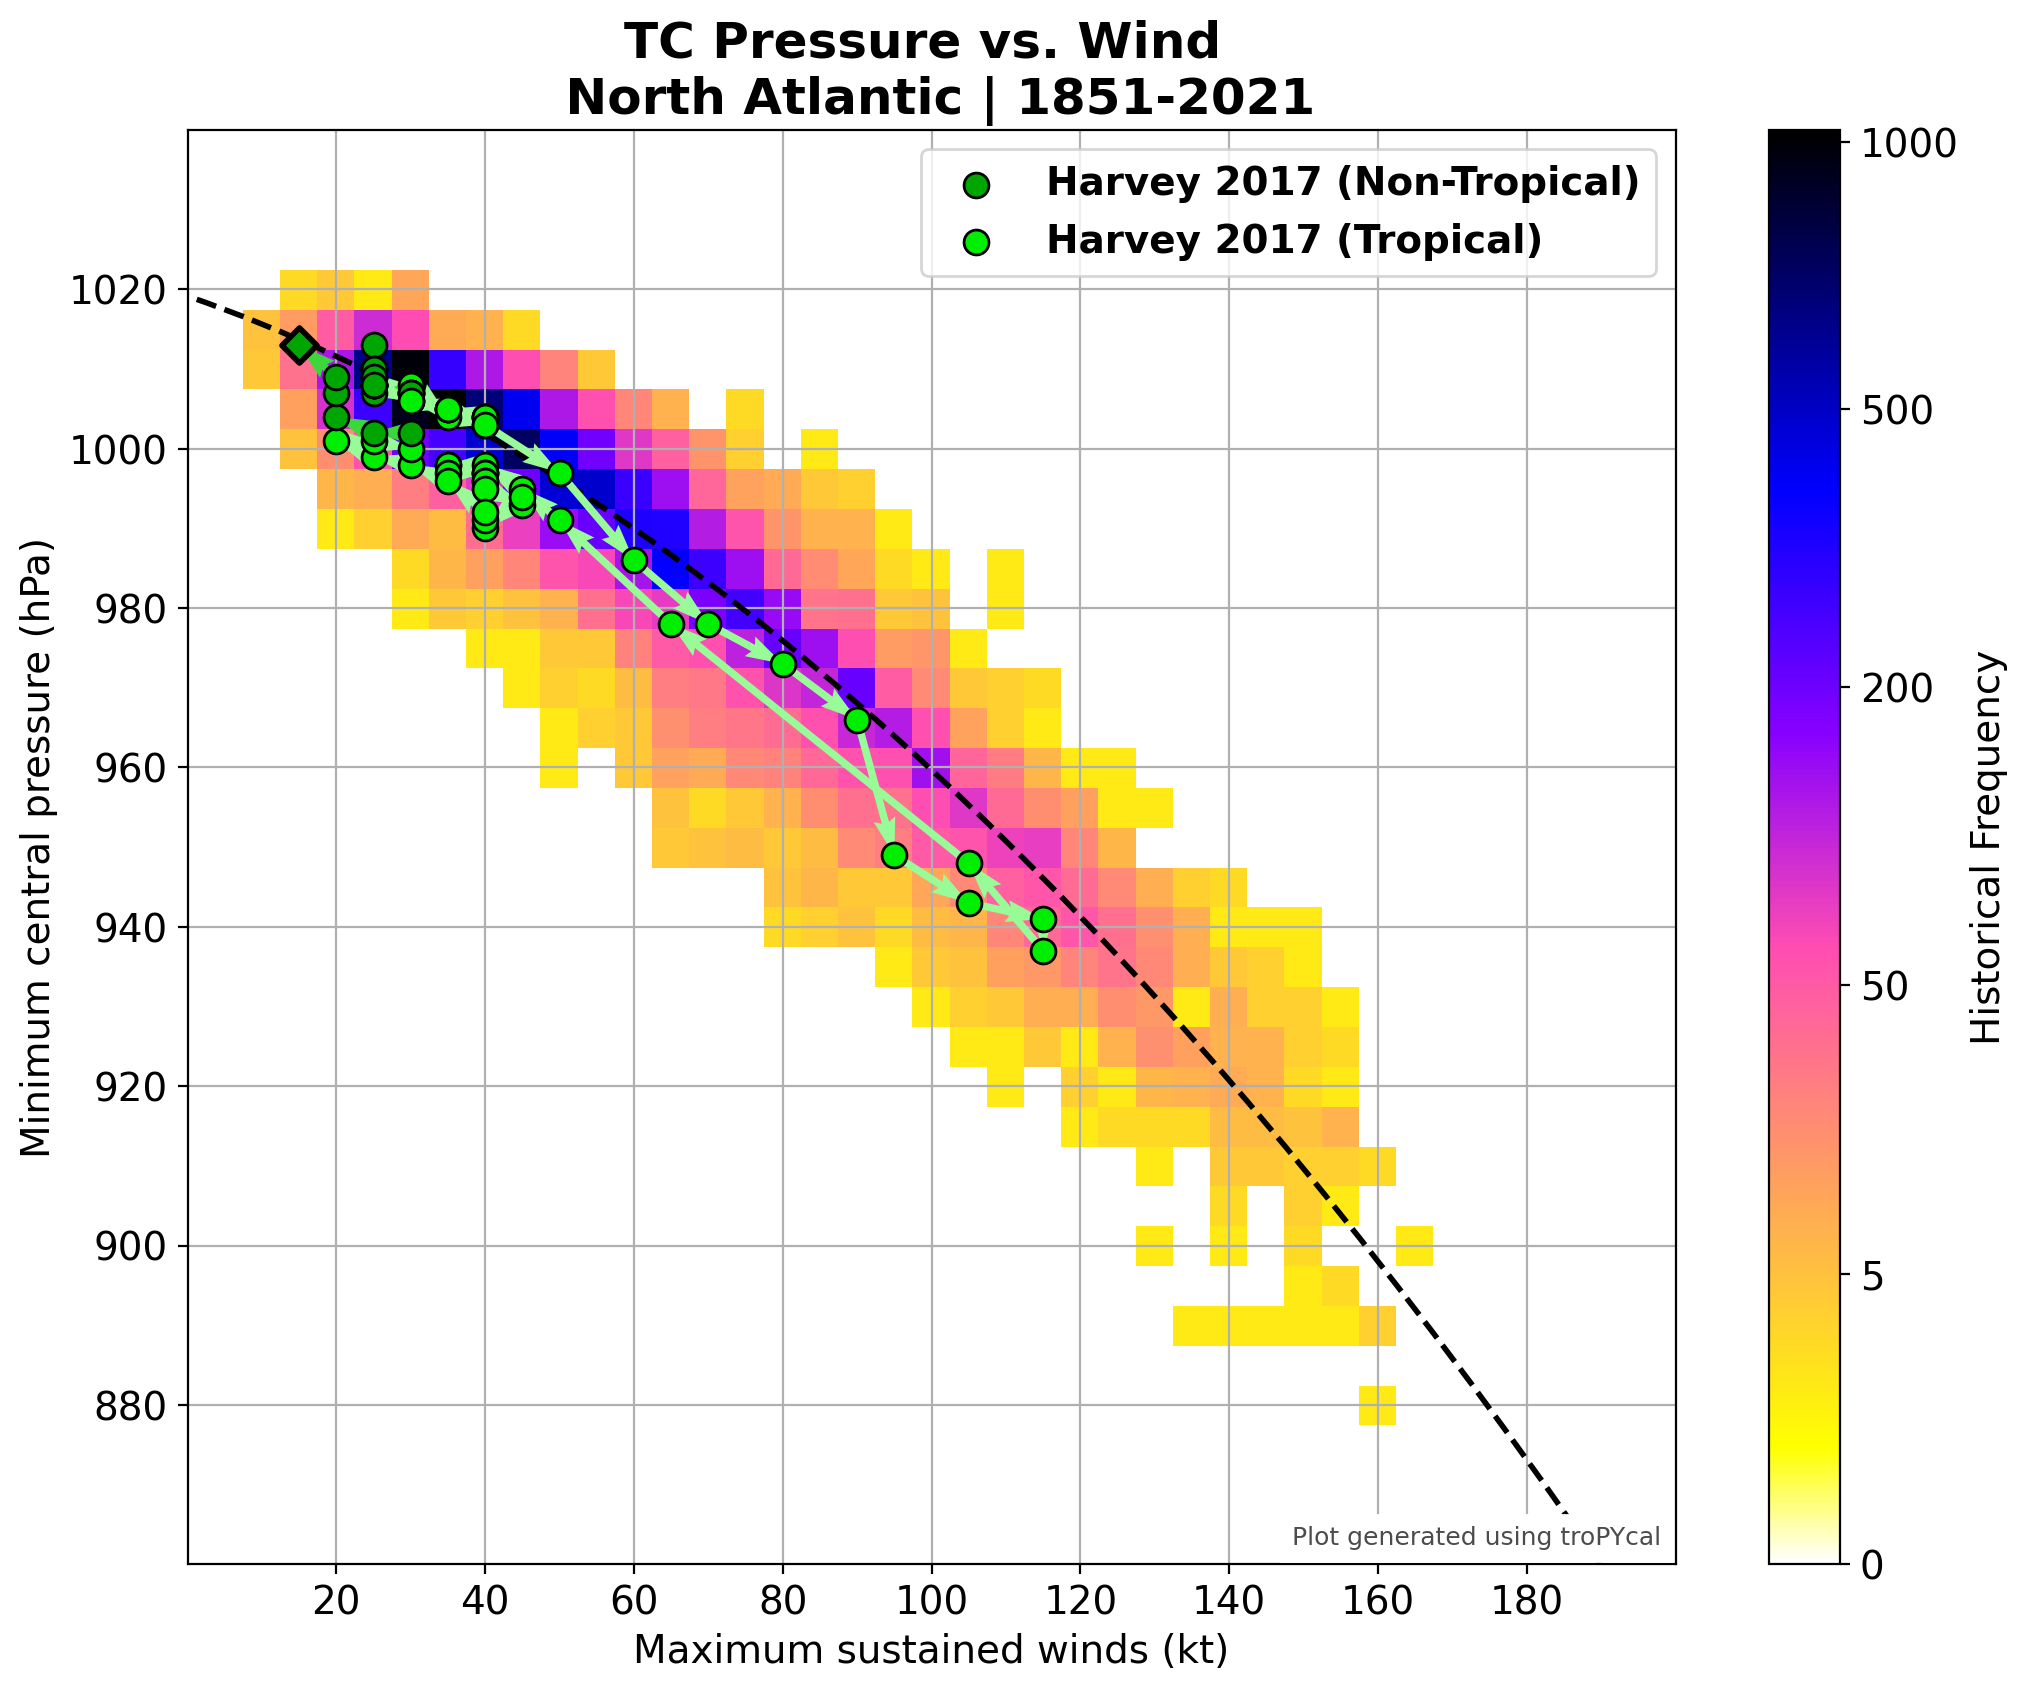

In [0]:
hurdat_atl.wind_pres_relationship(storm=('harvey',2017))

In [0]:
dff=pd.read_csv('/dbfs/mnt/AFcovid19/AFClimate/atlantic_hurricane.csv')

In [0]:
df=dff.copy()

In [0]:
bin_ranges = [1850,1870,1890,1910,1930,1950,1970,1990,2010,2020]
bin_names = ['1851-1870','1871-1890','1891-1910','1911-1930','1931-1950','1951-1970','1971-1990','1991-2010','2010-2020']

df['year_bin_range'] = pd.cut(
                                           np.array(
                                              df['year']), 
                                              bins=bin_ranges)
df['year_range'] = pd.cut(
                                           np.array(
                                            df['year']), 
                                              bins=bin_ranges,            
                                              labels=bin_names,ordered=False)
# view the binned features 
df

Out[42]:

,Unnamed: 0,storm_id,name,landfall,hurricane,vmax,mslp,init_date,final_date,year,status,category,start_lat,start_lon,mon,month,year_bin_range,year_range
0,0,AL011851,UNNAMED,1,1,80.0,NaN,1851-06-25,1851-06-28,1851,NaN,1,28.0,-94.8,Jun,6,"(1850, 1870]",1851-1870
1,1,AL021851,UNNAMED,0,1,80.0,NaN,1851-07-05,1851-07-05,1851,NaN,1,22.2,-97.6,Jul,7,"(1850, 1870]",1851-1870
2,2,AL031851,UNNAMED,0,0,50.0,NaN,1851-07-10,1851-07-10,1851,NaN,0,12.0,-60.0,Jul,7,"(1850, 1870]",1851-1870
3,3,AL041851,UNNAMED,1,1,100.0,NaN,1851-08-16,1851-08-27,1851,NaN,3,13.4,-48.0,Aug,8,"(1850, 1870]",1851-1870
4,4,AL051851,UNNAMED,0,0,50.0,NaN,1851-09-13,1851-09-16,1851,NaN,0,32.5,-73.5,Sep,9,"(1850, 1870]",1851-1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,26,AL272020,EPSILON,0,1,100.0,952.0,2020-10-19,2020-10-26,2020,HU,3,25.6,-55.4,Oct,10,"(2010, 2020]",2010-2020
1920,27,AL282020,ZETA,0,1,90.0,973.0,2020-10-24,2020-10-29,2020,HU,2,18.4,-82.6,Oct,10,"(2010, 2020]",2010-2020
1921,28,AL292020,ETA,0,1,130.0,923.0,2020-10-31,2020-11-13,2020,HU,4,14.9,-72.4,Oct,10,"(2010, 2020]",2010-2020
1922,29,AL302020,THETA,0,0,60.0,989.0,2020-11-10,2020-11-15,2020,TS,0,28.8,-41.0,Nov,11,"(2010, 2020]",2010-2020


In [0]:
bin_ranges = [-2,-1,0,2,4,5]
bin_names = ['Tropical Depression','Tropical Storm','Cat 1-2','Cat 3-4','Cat 5']

df['cat_bin_range'] = pd.cut(
                                           np.array(
                                              df['category']), 
                                              bins=bin_ranges)
df['Hu_Category'] = pd.cut(
                                           np.array(
                                             df['category']), 
                                              bins=bin_ranges,            
                                              labels=bin_names,ordered=False)
# view the binned features 
df

Out[43]:

,Unnamed: 0,storm_id,name,landfall,hurricane,vmax,mslp,init_date,final_date,year,status,category,start_lat,start_lon,mon,month,year_bin_range,year_range,cat_bin_range,Hu_Category
0,0,AL011851,UNNAMED,1,1,80.0,NaN,1851-06-25,1851-06-28,1851,NaN,1,28.0,-94.8,Jun,6,"(1850, 1870]",1851-1870,"(0, 2]",Cat 1-2
1,1,AL021851,UNNAMED,0,1,80.0,NaN,1851-07-05,1851-07-05,1851,NaN,1,22.2,-97.6,Jul,7,"(1850, 1870]",1851-1870,"(0, 2]",Cat 1-2
2,2,AL031851,UNNAMED,0,0,50.0,NaN,1851-07-10,1851-07-10,1851,NaN,0,12.0,-60.0,Jul,7,"(1850, 1870]",1851-1870,"(-1, 0]",Tropical Storm
3,3,AL041851,UNNAMED,1,1,100.0,NaN,1851-08-16,1851-08-27,1851,NaN,3,13.4,-48.0,Aug,8,"(1850, 1870]",1851-1870,"(2, 4]",Cat 3-4
4,4,AL051851,UNNAMED,0,0,50.0,NaN,1851-09-13,1851-09-16,1851,NaN,0,32.5,-73.5,Sep,9,"(1850, 1870]",1851-1870,"(-1, 0]",Tropical Storm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,26,AL272020,EPSILON,0,1,100.0,952.0,2020-10-19,2020-10-26,2020,HU,3,25.6,-55.4,Oct,10,"(2010, 2020]",2010-2020,"(2, 4]",Cat 3-4
1920,27,AL282020,ZETA,0,1,90.0,973.0,2020-10-24,2020-10-29,2020,HU,2,18.4,-82.6,Oct,10,"(2010, 2020]",2010-2020,"(0, 2]",Cat 1-2
1921,28,AL292020,ETA,0,1,130.0,923.0,2020-10-31,2020-11-13,2020,HU,4,14.9,-72.4,Oct,10,"(2010, 2020]",2010-2020,"(2, 4]",Cat 3-4
1922,29,AL302020,THETA,0,0,60.0,989.0,2020-11-10,2020-11-15,2020,TS,0,28.8,-41.0,Nov,11,"(2010, 2020]",2010-2020,"(-1, 0]",Tropical Storm


In [0]:
bin1_ranges = [0,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
bin1_names = ['1850s','1860s','1870s','1880s','1890s','1900s','1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020s']

df['Year_bin_range'] = pd.cut(
                                           np.array(
                                              df['year']), 
                                              bins=bin1_ranges)
df['Year_range'] = pd.cut(
                                           np.array(
                                             df['year']), 
                                              bins=bin1_ranges,            
                                              labels=bin1_names,ordered=False)
# view the binned features 
df

Out[44]:

,Unnamed: 0,storm_id,name,landfall,hurricane,vmax,mslp,init_date,final_date,year,status,category,start_lat,start_lon,mon,month,year_bin_range,year_range,cat_bin_range,Hu_Category,Year_bin_range,Year_range
0,0,AL011851,UNNAMED,1,1,80.0,NaN,1851-06-25,1851-06-28,1851,NaN,1,28.0,-94.8,Jun,6,"(1850, 1870]",1851-1870,"(0, 2]",Cat 1-2,"(1850, 1860]",1860s
1,1,AL021851,UNNAMED,0,1,80.0,NaN,1851-07-05,1851-07-05,1851,NaN,1,22.2,-97.6,Jul,7,"(1850, 1870]",1851-1870,"(0, 2]",Cat 1-2,"(1850, 1860]",1860s
2,2,AL031851,UNNAMED,0,0,50.0,NaN,1851-07-10,1851-07-10,1851,NaN,0,12.0,-60.0,Jul,7,"(1850, 1870]",1851-1870,"(-1, 0]",Tropical Storm,"(1850, 1860]",1860s
3,3,AL041851,UNNAMED,1,1,100.0,NaN,1851-08-16,1851-08-27,1851,NaN,3,13.4,-48.0,Aug,8,"(1850, 1870]",1851-1870,"(2, 4]",Cat 3-4,"(1850, 1860]",1860s
4,4,AL051851,UNNAMED,0,0,50.0,NaN,1851-09-13,1851-09-16,1851,NaN,0,32.5,-73.5,Sep,9,"(1850, 1870]",1851-1870,"(-1, 0]",Tropical Storm,"(1850, 1860]",1860s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,26,AL272020,EPSILON,0,1,100.0,952.0,2020-10-19,2020-10-26,2020,HU,3,25.6,-55.4,Oct,10,"(2010, 2020]",2010-2020,"(2, 4]",Cat 3-4,"(2010, 2020]",2020s
1920,27,AL282020,ZETA,0,1,90.0,973.0,2020-10-24,2020-10-29,2020,HU,2,18.4,-82.6,Oct,10,"(2010, 2020]",2010-2020,"(0, 2]",Cat 1-2,"(2010, 2020]",2020s
1921,28,AL292020,ETA,0,1,130.0,923.0,2020-10-31,2020-11-13,2020,HU,4,14.9,-72.4,Oct,10,"(2010, 2020]",2010-2020,"(2, 4]",Cat 3-4,"(2010, 2020]",2020s
1922,29,AL302020,THETA,0,0,60.0,989.0,2020-11-10,2020-11-15,2020,TS,0,28.8,-41.0,Nov,11,"(2010, 2020]",2010-2020,"(-1, 0]",Tropical Storm,"(2010, 2020]",2020s


In [0]:
dfw = df.groupby(['Year_range'])['vmax'].agg('mean').reset_index().rename(columns={'mean':'AWS'})
dfw= dfw.dropna()
dfw['vmax'] = dfw['vmax'].astype('int')
dfw

Out[45]:

,Year_range,vmax
1,1860s,78
2,1870s,75
3,1880s,75
4,1890s,75
5,1900s,73
6,1910s,67
7,1920s,75
8,1930s,76
9,1940s,70
10,1950s,72


In [0]:
fig=go.Figure()



fig.add_trace(go.Scatter(x=dfw['Year_range'], y=dfw['vmax'], name='avg hur wind speed',
                         line = dict(color='royalblue', width=3)))



fig.update_layout(title='Trend of Avg Wind speeds in US by decades',
                   xaxis_title='Years',
                   yaxis_title='Avg Wind Speed')

fig.show()

In [0]:
dfwm = df.groupby(['Year_range'])['vmax'].agg('max').reset_index().rename(columns={'mean':'AWS'})
dfwm= dfwm.dropna()
dfwm['vmax'] = dfwm['vmax'].astype('int')
dfwm

Out[46]:

,Year_range,vmax
1,1860s,130
2,1870s,120
3,1880s,130
4,1890s,130
5,1900s,130
6,1910s,130
7,1920s,130
8,1930s,145
9,1940s,160
10,1950s,125


In [0]:
fig=go.Figure()


fig.add_trace(go.Scatter(x=dfwm['Year_range'], y=dfwm['vmax'], name='max hur wind speed',line = dict(color='red', width=3)))
                         


fig.update_layout(title='Trend of Max Wind speeds in US by decades',
                   xaxis_title='Years',
                   yaxis_title='Max Wind Speed')

fig.show()